In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

import pandas as pd

import cv2
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from PIL import Image 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential

In [2]:

image_data = []
image_labels = []
total_classes = 43
height = 64
width = 64
channels = 3


for i in range(total_classes):
    path = 'Train/' + str(i)
#     print(path)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((height, width))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error - Image loading")

In [3]:
image_data = np.array(image_data)
image_labels = np.array(image_labels)

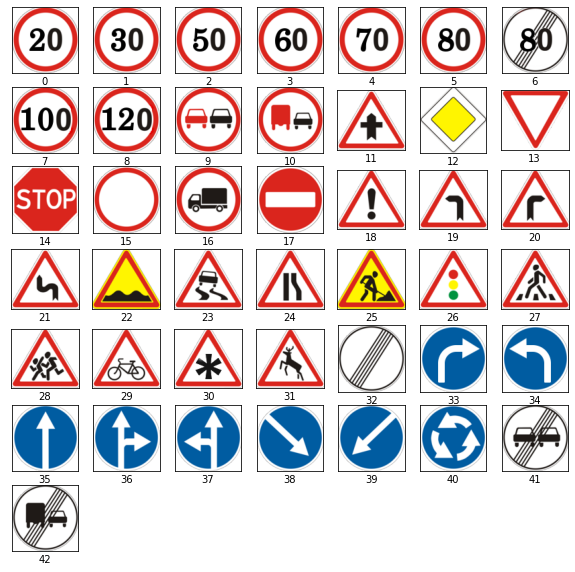

In [4]:
plt.figure(figsize=(10, 10))
for i in range (0,43):
    plt.subplot(7,7,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    path = "Meta/{0}.png".format(i)
    img = plt.imread(path)
    plt.imshow(img)
    plt.xlabel(i)

In [5]:
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [6]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)

X_train = X_train/255 
X_valid = X_valid/255

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (31367, 64, 64, 3)
X_valid.shape (7842, 64, 64, 3)
y_train.shape (31367,)
y_valid.shape (7842,)


In [8]:
y_train = keras.utils.to_categorical(y_train, total_classes)
y_valid = keras.utils.to_categorical(y_valid, total_classes)

print(y_train.shape)
print(y_valid.shape)

(31367, 43)
(7842, 43)


In [9]:
vgg16 = VGG16(input_shape=(64,64,3), weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 5s 0us/step


In [10]:
for layer in vgg16.layers:
    layer.trainable = False

In [11]:
add_model = Sequential()
add_model.add(Flatten(input_shape=vgg16.output_shape[1:]))

add_model.add(Dense(1024, activation='relu'))



add_model.add(Dense(y_train.shape[1], activation='softmax'))

model = Model(inputs=vgg16.input, outputs=add_model(vgg16.output))
learning_rate = 0.0001
def results(model):
  adam = Adam(lr=learning_rate)
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

In [12]:


epochs = 50
history = model.fit(X_train, y_train, batch_size=128, epochs=epochs,
validation_data=(X_valid, y_valid))



Epoch 1/50
246/246 [==============================] - 28s 62ms/step - loss: 1.2532 - accuracy: 0.6284 - val_loss: 0.8350 - val_accuracy: 0.7345
Epoch 2/50
246/246 [==============================] - 13s 52ms/step - loss: 0.5807 - accuracy: 0.8269 - val_loss: 0.5310 - val_accuracy: 0.8425
Epoch 3/50
246/246 [==============================] - 13s 53ms/step - loss: 0.3855 - accuracy: 0.8878 - val_loss: 0.4281 - val_accuracy: 0.8642
Epoch 4/50
246/246 [==============================] - 13s 53ms/step - loss: 0.2742 - accuracy: 0.9220 - val_loss: 0.3437 - val_accuracy: 0.8922
Epoch 5/50
246/246 [==============================] - 13s 53ms/step - loss: 0.2195 - accuracy: 0.9361 - val_loss: 0.2880 - val_accuracy: 0.9125
Epoch 6/50
246/246 [==============================] - 13s 52ms/step - loss: 0.1809 - accuracy: 0.9472 - val_loss: 0.3024 - val_accuracy: 0.8991
Epoch 7/50
246/246 [==============================] - 13s 52ms/step - loss: 0.1463 - accuracy: 0.9594 - val_loss: 0.2525 - val_accuracy:

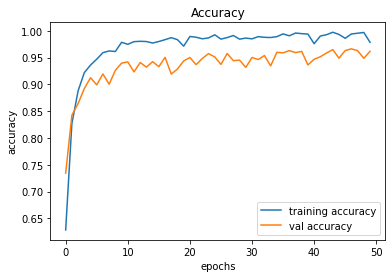

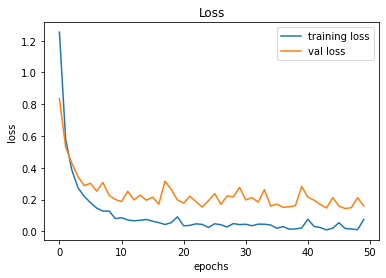

In [13]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [14]:
from sklearn.metrics import accuracy_score

test = pd.read_csv('Test.csv')

test_labels = test["ClassId"].values
test_imgs = test["Path"].values

In [15]:

test_image_data=[]
for img in test_imgs:
    try:
        test_img_path=img
        test_image = cv2.imread(test_img_path)
        test_image_fromarray = Image.fromarray(test_image, 'RGB')
        resize_test_image = test_image_fromarray.resize((height, width))

#         print(test_img_path)

        
        test_image_data.append(np.array(resize_test_image))
#             image_labels.append(i)
    except:
        print("Error - Image loading")

#Converting lists into numpy arrays
#Converting lists into numpy arrays
X_test = np.array(test_image_data)

In [16]:
expected_y  = test_labels
predicted_y = model.predict(X_test)
pred_y=predicted_y.argmax(axis=1)

In [19]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((64,64))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)


[ 0  1 38 ... 10  2  1]


In [20]:

print(accuracy_score(labels,classes_x))
model.save("ninetyfive.h5")

0.24330958036421219
